## Predicting diabetes using Pima Indian Women’s diabetes dataset

In [110]:
# For data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotnine import ggplot, aes, geom_histogram
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score




In [111]:
data = pd.read_csv("diabetes.csv")

In [112]:
data = pd.read_csv("diabetes.csv")


In [113]:
df = data

In [114]:
print(df.head())  # Show first few rows
df.info()         # Data types & missing values
df.describe()     # Summary stats

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


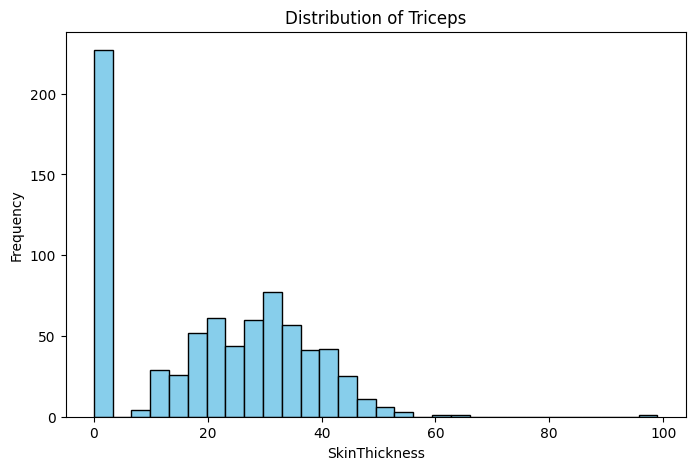

In [115]:
plt.figure(figsize=(8, 5))
plt.hist(df['SkinThickness'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Triceps')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

In [116]:
# List of columns to clean
columns_to_clean = ['SkinThickness', 'Glucose', 'BloodPressure', 'Insulin', 'BMI']

# Replace 0s with NaN in specified columns
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

In [117]:
print(df.shape[0])  # Should be 768

# Split features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split into 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=234589
)

# Confirm the split sizes
print(f"Training: {X_train.shape[0]}, Testing: {X_test.shape[0]}, Total: {df.shape[0]}")

768
Training: 576, Testing: 192, Total: 768


In [118]:
# Training set
diabetes_train = pd.concat([X_train, y_train], axis=1)

# Testing set
diabetes_test = pd.concat([X_test, y_test], axis=1)

# Optional: Check their shapes
print(diabetes_train.shape)
print(diabetes_test.shape)

(576, 9)
(192, 9)


In [119]:
# Features and target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

X = df[features]
y = df[target]

# Preprocessing pipeline: k-NN imputation + normalization
preprocessing_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),         # step_impute_knn()
    ('scaler', StandardScaler())                    # step_normalize()
])

# Fit-transform on training data
X_train_processed = preprocessing_pipeline.fit_transform(X_train[features])

# Transform test data
X_test_processed = preprocessing_pipeline.transform(X_test[features])

In [120]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [121]:

# Define features and target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

X = df[features]
y = df[target]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=234589
)

In [122]:

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),      # Impute missing values
    ('scaler', StandardScaler())                 # Normalize all numeric features
])

# Apply transformations
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [123]:
# Apply preprocessing pipeline to training data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# If you want a DataFrame instead of a NumPy array:
X_train_preprocessed = pd.DataFrame(
    X_train_processed,
    columns=X_train.columns,
    index=X_train.index
)

# Combine with target to match R's output
diabetes_train_preprocessed = pd.concat([X_train_preprocessed, y_train], axis=1)

# Show the preprocessed training data
print(diabetes_train_preprocessed.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
8      -0.542081  2.459465      -0.211272       1.626851  4.068880 -0.286352   
532    -0.842310 -1.188193      -0.538886       2.356669 -0.881595  1.306263   
137    -1.142540 -0.958161      -1.030308      -0.458345 -0.601965 -0.551788   
640    -1.142540 -0.662405       1.099187      -1.292423 -0.467329 -0.463310   
194     1.259296 -1.221055      -1.439827      -0.979644 -0.446616 -1.185885   

     DiabetesPedigreeFunction       Age  Outcome  
8                   -0.969454  1.718254        1  
532                  1.359626 -0.354265        0  
137                  0.178209 -0.958750        0  
640                  0.678393 -0.526975        0  
194                 -1.036963  0.768349        0  


In [124]:
# Define the base model
rf_model = RandomForestClassifier(
    random_state=234589,
    n_jobs=-1,
    criterion='gini',       # Equivalent to "impurity"
)

# Set up the parameter grid for tuning (e.g., mtry = max_features in Python)
param_grid = {
    'max_features': [2, 3, 4, 5, 6],  # Tune this like `mtry`
    'n_estimators': [100],           # Optional: add more params to tune
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',     # Use 'roc_auc' for probability-based scoring
    verbose=1
)

In [125]:
# Define logistic regression model for classification
lr_model = LogisticRegression(
    solver='lbfgs',       # Solver for optimization
    max_iter=1000,        # Ensure convergence
    random_state=234589
)

In [126]:
# Define full workflow (pipeline)
rf_workflow = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),        # step_impute_knn
    ('scaler', StandardScaler()),                  # step_normalize
    ('model', RandomForestClassifier(
        random_state=234589,
        n_jobs=-1,
        criterion='gini'
    ))
])

In [127]:
rf_workflow = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        random_state=234589,
        n_jobs=-1
    ))
])

# Define the parameter grid (mtry = max_features in sklearn)
rf_grid = {
    'model__max_features': [3, 4, 5]
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_workflow,
    param_grid=rf_grid,
    scoring=scoring,
    refit='accuracy',     # You can change to 'roc_auc' if desired
    cv=5,
    return_train_score=True,
    verbose=1
)

# Run the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=234589))]),
             param_grid={'model__max_features': [3, 4, 5]}, refit='accuracy',
             return_train_score=True,
             scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}, verbose=1)

In [128]:
# Best parameters
print("Best params:", grid_search.best_params_)

# Best accuracy score
print("Best accuracy:", grid_search.best_score_)

# Full CV results
cv_results = pd.DataFrame(grid_search.cv_results_)

Best params: {'model__max_features': 3}
Best accuracy: 0.753463268365817


In [129]:
# This is your finalized workflow (with best mtry)
best_model = grid_search.best_estimator_

# You can use it to make predictions on test data:
y_pred = best_model.predict(X_test)

# Or get probabilities for ROC AUC:
y_prob = best_model.predict_proba(X_test)[:, 1]

In [130]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7760
Test ROC AUC: 0.8186

Confusion Matrix:
[[105  20]
 [ 23  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192



In [131]:
best_model = grid_search.best_estimator_

In [132]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Collect metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_prob)

# Store in a dictionary (like a small DataFrame)
test_performance = {
    'accuracy': round(test_accuracy, 4),
    'roc_auc': round(test_roc_auc, 4)
}

# View results
print(test_performance)

{'accuracy': 0.776, 'roc_auc': np.float64(0.8186)}


In [133]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Combine into a DataFrame
test_predictions = pd.DataFrame({
    'truth': y_test,
    'predicted': y_pred,
    'probability': y_prob
})

# View the first few rows
print(test_predictions.head())

     truth  predicted  probability
531      0          0         0.25
628      0          1         0.61
475      0          0         0.41
422      0          0         0.23
529      0          0         0.12


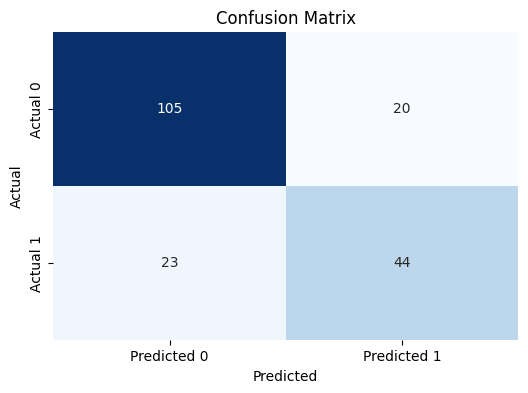

In [134]:
cm = confusion_matrix(test_predictions['truth'], test_predictions['predicted'])

# Plot it nicely using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

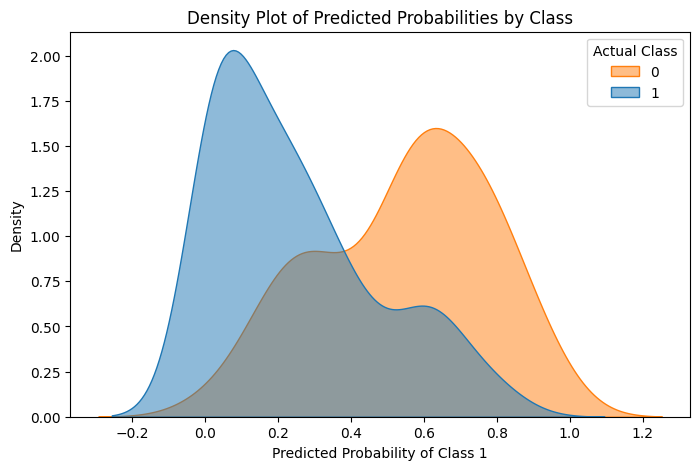

In [135]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=test_predictions,
    x='probability',
    hue='truth',
    fill=True,
    common_norm=False,
    alpha=0.5
)

plt.title('Density Plot of Predicted Probabilities by Class')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Density')
plt.legend(title='Actual Class', labels=['0', '1'])
plt.show()

In [136]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]


In [143]:
# Load your cleaned dataset
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [147]:
# Define pipeline
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
final_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [148]:
rf_model = final_model.named_steps['classifier']
print(rf_model.feature_importances_)

[0.08118029 0.23983302 0.09413621 0.08310536 0.09375514 0.15973546
 0.12267521 0.12557931]


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [152]:
final_model = rf_pipeline.fit(X_train, y_train)

In [153]:
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [155]:
new_woman = pd.DataFrame([{
    'Pregnancies': 2,
    'Glucose': 95,
    'BloodPressure': 70,
    'SkinThickness': 31,
    'Insulin': 102,
    'BMI': 28.2,
    'DiabetesPedigreeFunction': 0.67,
    'Age': 47
}])

In [157]:
proba = final_model.predict_proba(new_woman)
print("Probability of Not Diabetic:", proba[0][0])
print("Probability of Diabetic:", proba[0][1])

Probability of Not Diabetic: 0.66
Probability of Diabetic: 0.34


In [159]:
prediction = final_model.predict(new_woman)
print("Predicted class:", prediction[0])

Predicted class: 0


In [160]:
rf_model = final_model.named_steps['classifier']

In [161]:
importances = rf_model.feature_importances_
print(importances)

[0.07213347 0.25482459 0.09077233 0.076357   0.09338949 0.16441154
 0.11203395 0.13607763]


In [163]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1                   Glucose    0.254825
5                       BMI    0.164412
7                       Age    0.136078
6  DiabetesPedigreeFunction    0.112034
4                   Insulin    0.093389
2             BloodPressure    0.090772
3             SkinThickness    0.076357
0               Pregnancies    0.072133


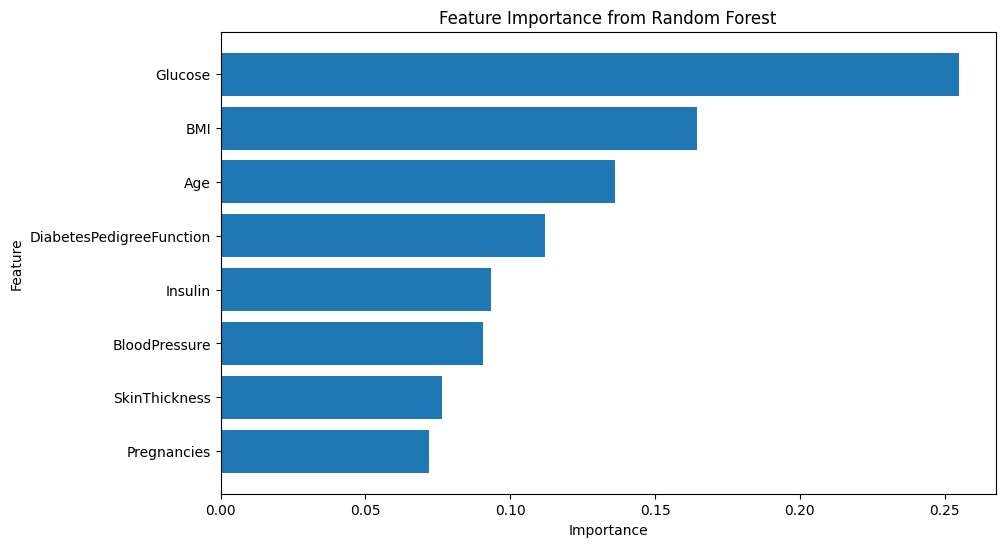

In [164]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.show()